# Phase study on lens modelling

*Created on Sat Oct 16*

**@author**: [PaoloCremo](https://github.com/PaoloCremo)

In [1]:
#%%load packages and functions
import os
path_home = os.path.expanduser('~')
import sys 
sys.path.insert(1, path_home+'/Dropbox/PhD/Python/program_py/packages')
from pyCBC_function import *
# from Dropbox.PhD.Python.program_py.packages import LISA as li
import LISA as li
lisa = li.LISA()
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

#plot
import matplotlib.pyplot as plt
%matplotlib inline
if 'paolocremonese' in path_home:
    print("We're on Mac!")
    from matplotlib.ticker import ScalarFormatter
    #To activate 
    %config InlineBackend.figure_format = 'retina'

         	Approximation will be used...
We're on Mac!


### define case

In [2]:
case = 'h'#'d'
df = 10**-6
dt = 1 
zS = 1.
DS = cosmo.luminosity_distance(zS).value #distance of the source in Mpc
# zL = 0.5
Ml = 10**9
f_min = 10**-5-df
MTOT = 10**8*(1+zS)
q = 1.
m1 = MTOT/(1+q)
m2 = MTOT-m1

__make waveforms__

In [3]:
hpt, hct = get_fd_waveform(approximant='IMRPhenomPv3', mass1=m1, mass2=m2,
                         delta_f=df, f_lower=f_min, inclination=np.pi/3,
                         # s1z = 0.7, s2z = 0.2,
                         distance=DS, coa_phase=0)#np.pi/2)

fr = hpt.sample_frequencies
#%% deg frequency domain
zS_deg = 1.
DS_deg = cosmo.luminosity_distance(zS_deg).value 
hpt_deg, hct_deg = get_fd_waveform(approximant='IMRPhenomPv3', mass1=m1, mass2=m2,
                         delta_f=df, f_lower=f_min, inclination=np.pi/3,
                         # s1z = 0.7, s2z = 0.2,
                         distance=DS_deg, coa_phase=np.pi)
l_un = 'un - $z=%.2f$'%(zS_deg)
#%%
zS_deg2 = 0.48
DS_deg2 = cosmo.luminosity_distance(zS_deg2).value 
hpt_deg2, hct_deg2 = get_fd_waveform(approximant='IMRPhenomPv3', mass1=m1, mass2=m2,
                         delta_f=df, f_lower=f_min, inclination=np.pi/3,
                         # s1z = 0.7, s2z = 0.2,
                         distance=DS_deg2, coa_phase=0)

__load amps & make lensing__

In [4]:
# l2 = 'NFW_2' 
# y2 = '001796' 
# 
# l1 = 'GNFW_2' 
# y1 = '004059' 
# 
# afFP1 = path_home+'/Desktop/waveform/case_h/'+l1+'/amps/amps_case_h_H74_y'+y1+'_M10-9_zL025_FP'
# ampsFP_1 = np.fromfile(afFP1, np.complex64)
# hLtFP_1 = hpt * np.conj(ampsFP_1)
# 
# afFP2 = path_home+'/Desktop/waveform/case_h/'+l2+'/amps/amps_case_h_H74_y'+y2+'_M10-9_zL025_FP'  
# ampsFP_2 = np.fromfile(afFP2, np.complex64)
# # hLtFP_2 = hpt * np.conj(ampsFP_2)
# hLtFP_2 = hpt_deg2 * np.conj(ampsFP_2)

make lensing

In [5]:
#%% load amps FP together
ls = ['SIS', 'NFW', 'GNFW_2', 'NFW_2']
zls, ys = '025', ['1', '00068', '004059', '001796'] # zL = 0.25
# zls, ys = '05', ['1', '001061', '00634', '002804'] # zL = 0.5
hLtFP = [[] for i in range(len(ls))]
ampsFP = [[] for i in range(len(ls))]
for n, (l,y) in enumerate(zip(ls, ys)):
    afFP =   path_home+'/Desktop/waveform/case_h/'+l+'/amps/amps_case_h_H74_y'+y+'_M10-9_zL'+zls+'_FP'
#     print(l)
    ampsFP_i = np.fromfile(afFP, np.complex64)
    ampsFP[n] = ampsFP_i
    hL = hpt * np.conj(ampsFP_i)
    hLtFP[n] = hL
    
# hLtFP[3] = hpt_deg * np.conj(ampsFP_i)

In [6]:
# deg
hLtFP_2 = hpt_deg2 * np.conj(ampsFP[3])

__plot__

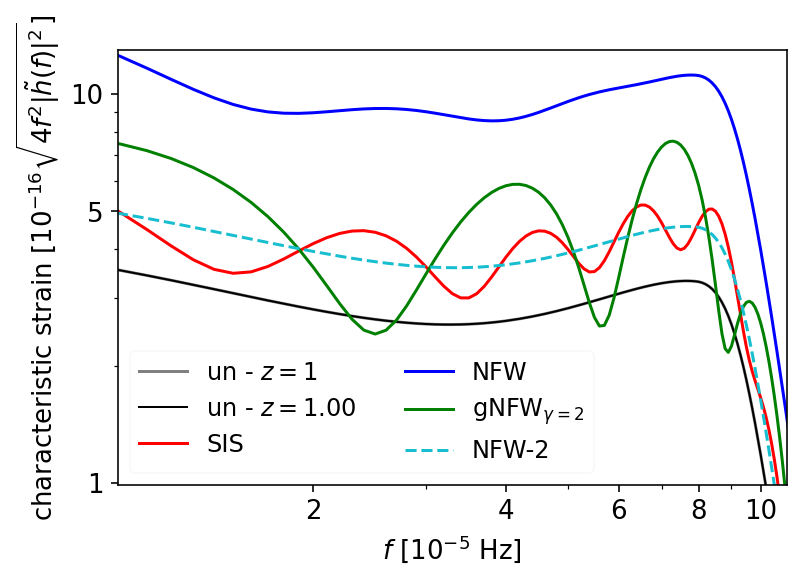

In [7]:
colors = ['red', 'blue', 'green', df_clr[9]]
labels = [ls[0], ls[1], 'gNFW$_{\gamma=2}$', 'NFW-2']
lnst = ['solid', 'solid', 'solid', '--']
plt.figure()

plt.plot(fr, 2*fr*abs(hpt), c='grey', label='un - $z=1$')
plt.plot(fr, 2*fr*abs(hpt_deg), c='k', linewidth=1, label=l_un)
for n,i in enumerate(labels):
    plt.plot(fr, 2*fr*abs(hLtFP[n]),  c=colors[n], label=i, linestyle=lnst[n])
# plt.plot(fr, 2*fr*abs(hLtFP[3]),  c=colors[3], label=labels[3], linestyle=lnst[3])
# plt.plot(fr, 2*fr*abs(hLtFP_2),  '-.', c='orangered', label='NFW'+' - $z_S=%.2f$'%(zS_deg2)) # - $z_L=0.25

plt.xscale('log')
plt.yscale('log')
# plt.grid()
plt.xlim(0.99e-5, 1.1*10**-4)
plt.ylim(9.9*10**-17, 1.3*10**-15)
# plt.ylim(1.8e-16, 5.8e-16)
plt.xlabel('$f$ [$10^{-5}$ Hz]', fontsize=fontsz)
plt.ylabel('characteristic strain $[10^{-16} \sqrt{4f^2|\\tilde{h}(f)|^2}]$', fontsize=fontsz)
plt.tick_params(axis='both',which='both',direction='out',labelsize=fontsz)
# plt.legend(ncol=3,loc='lower center',bbox_to_anchor=(0.5,1.),fontsize=fontsz,framealpha=0.5)
# plt.yticks([2e-16, 3e-16, 4e-16, 5e-16], [2,3,4,5])
plt.yticks([i*10**-16 for i in [1,5,10]], [1,5,10])
plt.xticks([i*10**-5 for i in range(2,11, 2)], range(2, 11,2))
plt.legend(ncol=2, loc='lower left',fontsize=fontsz-1,framealpha=0.1)
plt.show()

# %% save plot
# plt.savefig('/home/paolo/Dropbox/PhD/plots/lens_masses/SISNFW_y1_M10-9_TD.png',
# plt.savefig(path_home+'/Dropbox/PhD/plots/lens_masses/all_zS025.png',
# plt.savefig(path_home+'/Desktop/all_zS025_3.png',
#             dpi=300, format='png', transparent=True, bbox_inches="tight")
# plt.close()

## Phase study

phase of amplification factor

In [8]:
lm1 = 0
lm2 = 1
print('model 1: {}\nmodel 2: {}'.format(labels[lm1], labels[lm2]))

model 1: SIS
model 2: NFW


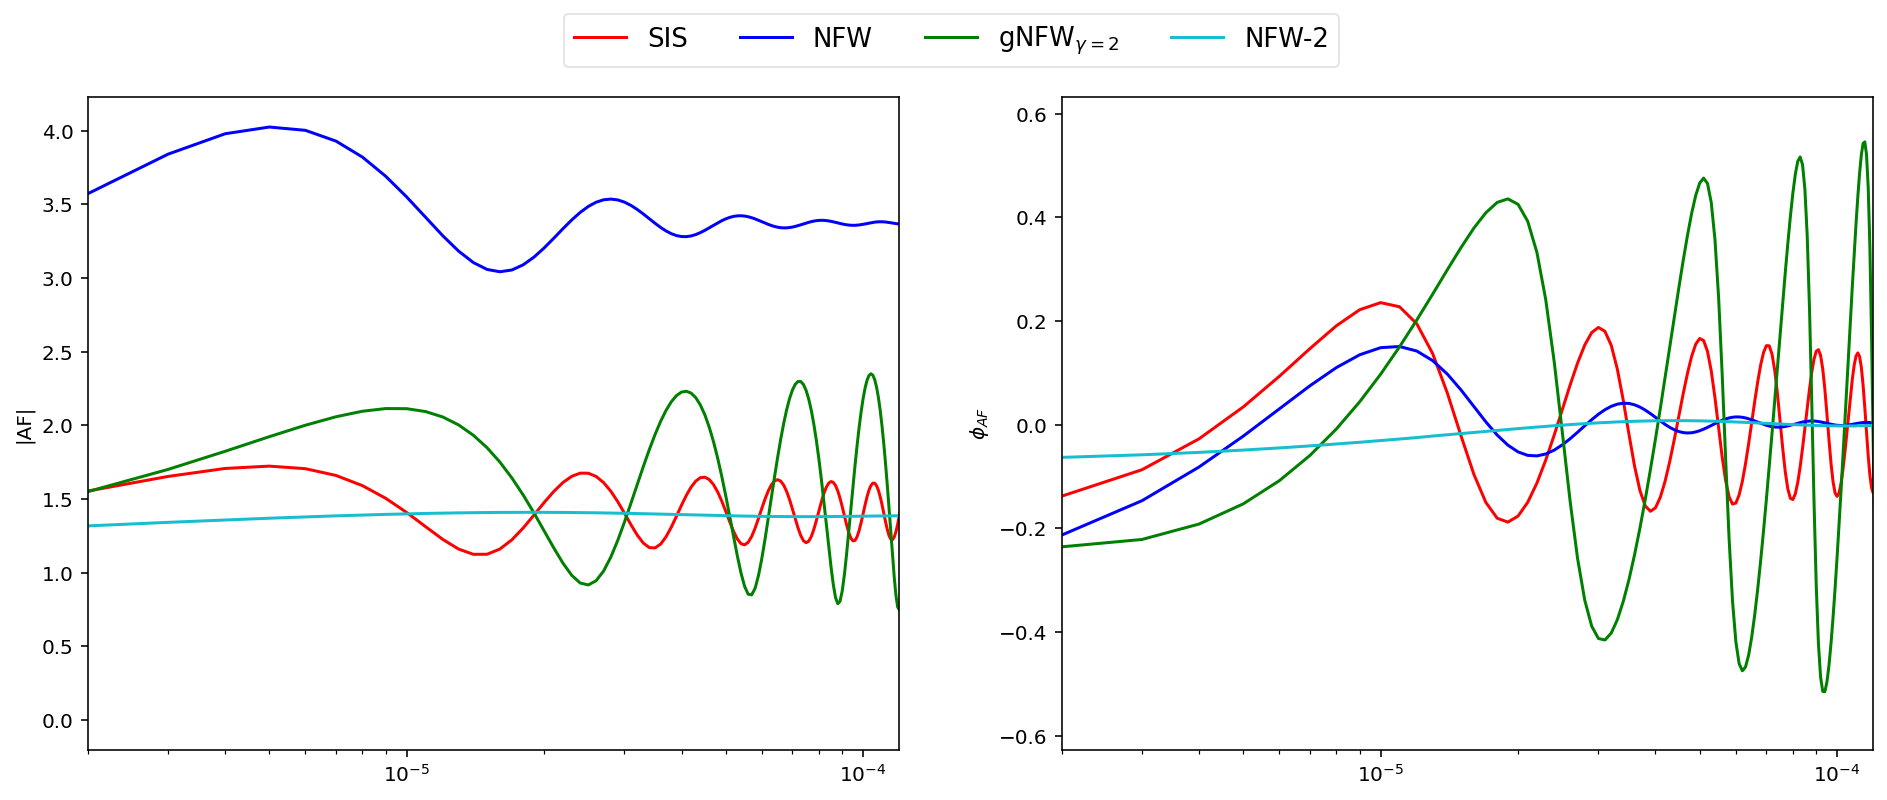

In [9]:
fig,axs = plt.subplots(1,2, figsize=(16,6))
for i in range(4):
    axs[0].plot(fr, np.abs(ampsFP[i]), c=colors[i], label=labels[i])
    axs[1].plot(fr, np.angle(ampsFP[i]), c=colors[i])#, label=labels[i])
    
axs[0].set_xscale('log')
axs[1].set_xscale('log')
axs[0].set_ylabel('|AF|')
axs[1].set_ylabel('$\phi_{AF}$')
[axs[n].set_xlim(2e-6, 1.2e-4) for n in [0,1]]
fig.legend(ncol=4,loc='lower center',bbox_to_anchor=(0.5,.9),fontsize=fontsz,framealpha=0.5)

__calculate phases__

In [10]:
ps_wfL = [[] for i in range(len(ls))]
# norm = [0, 6.1, 0, 6.1]
for n in range(len(ls)):
    ps_wfL[n] = phase_from_frequencyseries(hLtFP[n])
ps_t = phase_from_frequencyseries(hpt)
'''
for n in range(4):
    norm = ps_t[11]-ps_wfL[n][11]
    ps_wfL[n] += norm
'''

'\nfor n in range(4):\n    norm = ps_t[11]-ps_wfL[n][11]\n    ps_wfL[n] += norm\n'

__plot phases__

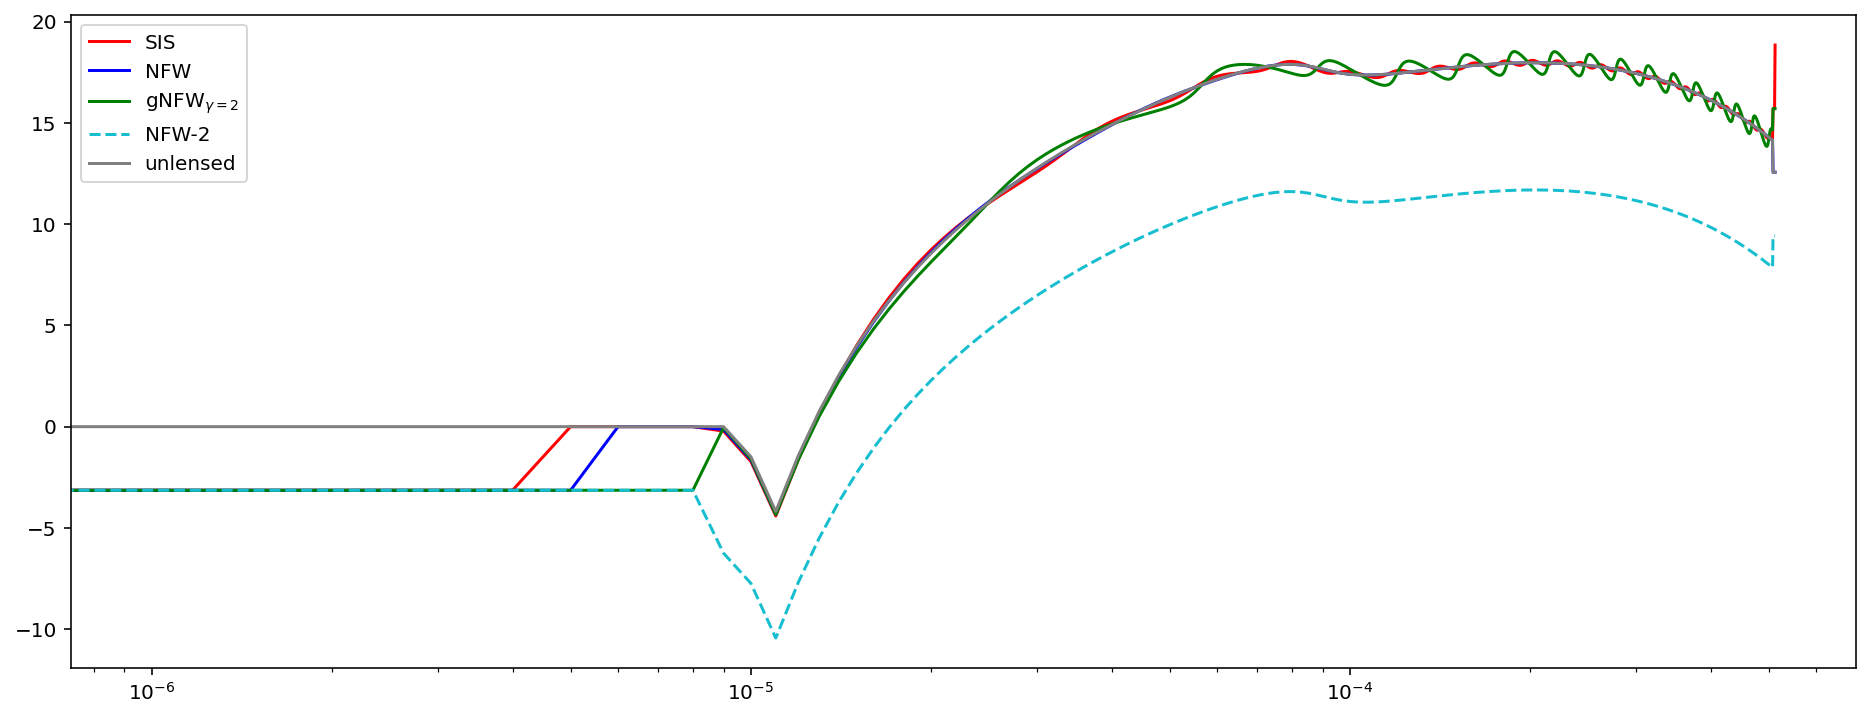

In [11]:
plt.figure(figsize=(16,6))
for i in range(len(ls)):
    plt.plot(hpt.sample_frequencies, ps_wfL[i], c = colors[i], label=labels[i], linestyle=lnst[i])
plt.plot(fr, ps_t, label='unlensed', c='grey')
# plt.xlim(1e-5, 1.2e-4) 
# zoom
# plt.xlim(5e-5, 1e-4)
# plt.ylim(19.1, 21.2)
plt.xscale('log')
plt.legend()
plt.show()

In [12]:
[print(ps_wfL[0][11]-ps_wfL[i][11]) for i in range(1,4)]

-0.07664680284149661
-0.07719978137618977
6.028017962373772


[None, None, None]

In [13]:
[6.132490122884996,0.02382179666388451,6.164218040897755] # tutti pi/2
[6.132490122884995,0.02382179666388451,6.164218040897755] # tutti 3/2 pi
[-0.15069518429459006,0.023821796663884953,6.164218040897755] # tutti 0
[-0.15069518429459006,0.023821796663884953,3.0226253873079623] # tutti 0 - NFW-2 pi/2
[6.132490122884996,0.02382179666388451,9.305810694487548] # tutti pi/2 - NFW-2 pi

[6.132490122884996, 0.02382179666388451, 9.305810694487548]

### compare lensed and unlensed

In [14]:
lm1 = 2
# lm2 = 1
print('model 1: {}\nmodel 2: {}\n'.format(labels[lm1], labels[lm2]))

# errors

rho2 = 10
# rho1 = 10

d2 = 1/rho2/2
print(d2)
# d1 = 1/rho1/2
# print(d1)

err = d2/ps_wfL[lm1]
eru = d2/ps_t
eaa = (err* (ps_wfL[lm1]/ps_t))/2
eau = (eru * 1)/2
#%% plot phases
iin = 0
# ifi = len(fr)#1262
norm = 1#ps_t

model 1: gNFW$_{\gamma=2}$
model 2: NFW

0.05


/Users/paolocremonese/opt/anaconda3/envs/igwn-py38/lib/python3.8/site-packages/pycbc/types/array.py:375: RuntimeWarning: divide by zero encountered in true_divide
  return self._data.__rtruediv__(other)
/Users/paolocremonese/opt/anaconda3/envs/igwn-py38/lib/python3.8/site-packages/pycbc/types/array.py:368: RuntimeWarning: divide by zero encountered in true_divide
  return self._data / other
/Users/paolocremonese/opt/anaconda3/envs/igwn-py38/lib/python3.8/site-packages/pycbc/types/array.py:368: RuntimeWarning: invalid value encountered in true_divide
  return self._data / other


__plot__

/Users/paolocremonese/opt/anaconda3/envs/igwn-py38/lib/python3.8/site-packages/pycbc/types/array.py:399: RuntimeWarning: invalid value encountered in subtract
  return self._data - other


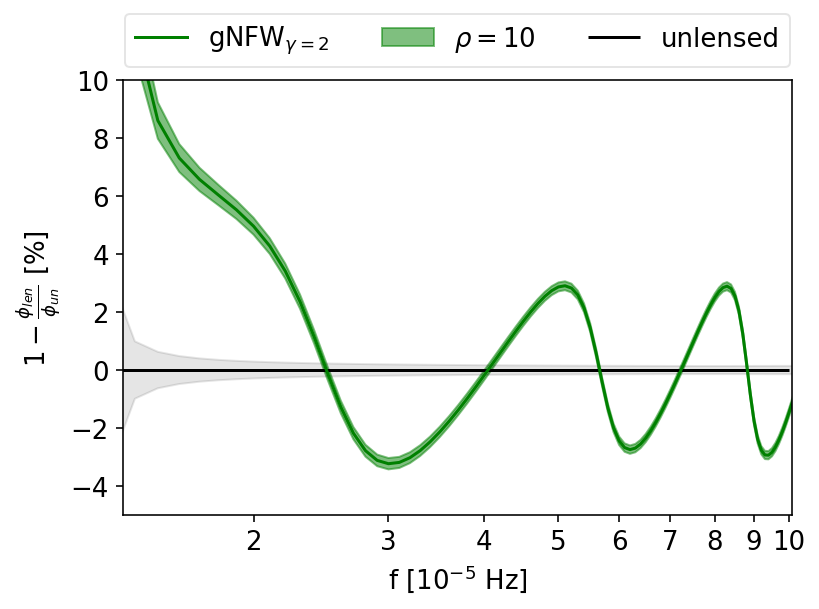

In [15]:
plt.figure()


# lensed 2
'''
plt.fill_between(hpt.sample_frequencies, (ps_wfL2-d2)/norm, (ps_wfL2+d2)/norm, color=df_clr[9], alpha=0.5, label='$\\rho=%i$'%(rho2))
plt.plot(hpt.sample_frequencies, ps_wfL2/norm, c=df_clr[9], label=l2)
# '''

# lensed 1
# '''
plt.fill_between(hpt.sample_frequencies, (((ps_t-ps_wfL[lm1])/ps_t)-eaa)*100, (((ps_t-ps_wfL[lm1])/ps_t)+eaa)*100, color=colors[lm1], alpha=0.5, label='$\\rho=%i$'%(rho2))
# plt.plot(hpt.sample_frequencies, ps_wfL1/norm, c=df_clr[9], label=l1)
plt.plot(hpt.sample_frequencies, ((ps_t-ps_wfL[lm1])/ps_t)*100, c=colors[lm1], label=labels[lm1])
# '''
# unlensed
plt.hlines(0, 10**-5, 10**-4, color='k', label='unlensed')
plt.fill_between(hpt.sample_frequencies, -eau.data*100, +eau.data*100, color='k', alpha=0.1)
# plt.plot(hpt.sample_frequencies, ps_t/norm, linewidth=1, c='k', label='unlensed')
# plt.plot(hpt.sample_frequencies, ps_tdeg/norm, '--', linewidth=1,  c='r', label='un - $z=0.8$')

# plt.xlim(9.9*10**-6, 3*10**-4)
plt.xlim(1.35*10**-5, 1.01*10**-4)
plt.ylim(-5., 10)

# plt.grid()
plt.xlabel('f [$10^{-5}$ Hz]', fontsize = fontsz)
plt.ylabel('$1-\\frac{\phi_{len}}{\phi_{un}}~[\%]$', fontsize = fontsz)
# plt.ylabel('$\phi$ [rad]', fontsize = fontsz)

plt.xscale('log')

plt.legend(ncol=4,loc='lower center',bbox_to_anchor=(0.5,1.),fontsize=fontsz,framealpha=0.5)
plt.tick_params(axis='both',which='both',direction='out',labelsize=fontsz)
plt.xticks([i*10**-5 for i in range(2,11,1)], range(2,11,1))
plt.show()
# %% save plot
# plt.savefig('/home/paolo/Dropbox/PhD/plots/lens_masses/shifted_phase_'+l1+'_FE.png',
# plt.savefig('/home/paolo/Dropbox/PhD/plots/lens_masses/SIS_shifted_phase_norm.png', 
# plt.savefig('/home/paolo/Dropbox/PhD/plots/lens_masses/'+l2+'_shifted_phase_norm.png',            
#             dpi=300, format='png', transparent=True, bbox_inches="tight")
# plt.close()

### compare two lensed WF

In [16]:
print(labels)#.replace('$', ''))

['SIS', 'NFW', 'gNFW$_{\\gamma=2}$', 'NFW-2']


In [17]:
lm1 = 1
lm2 = 2
print('model 1: {}\nmodel 2: {}\n'.format(labels[lm1], labels[lm2]))

#%% calculate error of normalized phases
norm = ps_wfL[lm2] #ps_t
rho1 = 800#1.5*10**3
d1 = 1/rho1
# d1 = 3.2/rho1
er12 = d1/ps_wfL[lm2]# + d1/ps_t
er11 = d1/ps_wfL[lm1]# + d1/ps_t
eru1 = d1/ps_t

ea12 = (ps_wfL[lm2]/norm * er12)/2
ea11 = (ps_wfL[lm1]/norm * er11)/2
eau1 = (ps_t/norm * eru1)/2

rho2 = 100
d2 = 1/rho2
# d2 = 3.2/rho2

er1 = d2/ps_wfL[lm1]# + d2/ps_t
er2 = d2/ps_wfL[lm2]# + d2/ps_t
eru = d2/ps_t

ea1 = (ps_wfL[lm1]/norm * er1)/2
ea2 = (ps_wfL[lm2]/norm * er2)/2
eau = (ps_t/norm*eru)/2

model 1: NFW
model 2: gNFW$_{\gamma=2}$



/Users/paolocremonese/opt/anaconda3/envs/igwn-py38/lib/python3.8/site-packages/pycbc/types/array.py:375: RuntimeWarning: divide by zero encountered in true_divide
  return self._data.__rtruediv__(other)
/Users/paolocremonese/opt/anaconda3/envs/igwn-py38/lib/python3.8/site-packages/pycbc/types/array.py:368: RuntimeWarning: invalid value encountered in true_divide
  return self._data / other
/Users/paolocremonese/opt/anaconda3/envs/igwn-py38/lib/python3.8/site-packages/pycbc/types/array.py:333: RuntimeWarning: invalid value encountered in multiply
  return self._data * other


__plot__

/Users/paolocremonese/opt/anaconda3/envs/igwn-py38/lib/python3.8/site-packages/pycbc/types/array.py:368: RuntimeWarning: invalid value encountered in true_divide
  return self._data / other


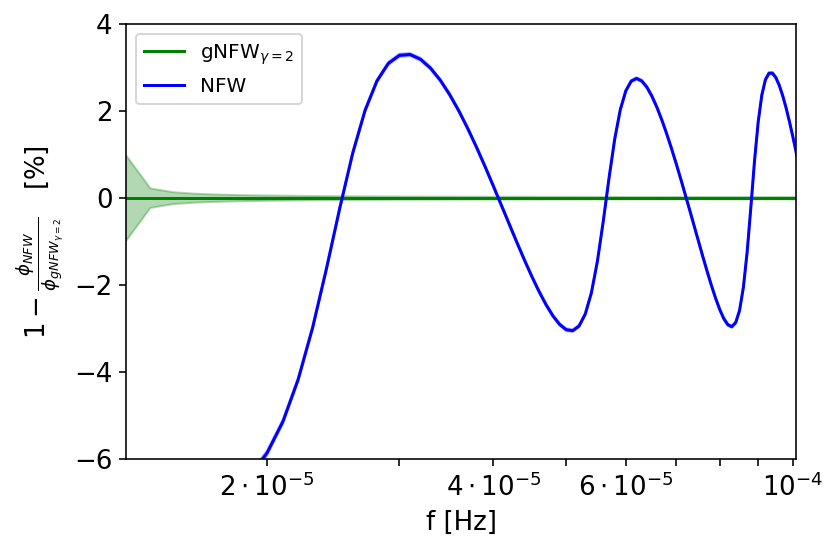

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)


# lensed 2
# '''
plt.fill_between(hpt.sample_frequencies, ((1-ps_wfL[lm2]/norm)-ea2)*100, (1-(ps_wfL[lm2]/norm)+ea2)*100, 
                 color=colors[lm2], alpha=0.3)#, label='$\\rho=%i$'%(rho2))
# plt.fill_between(hpt.sample_frequencies, ((1-ps_wfL2/norm)-ea12)*100, ((1-ps_wfL2/norm)+ea12)*100, color=c2, alpha    =0.4)
plt.plot(hpt.sample_frequencies, (1-ps_wfL[lm2]/norm)*100, c=colors[lm2], label=labels[lm2])
# '''


# lensed 1

# '''
plt.fill_between(hpt.sample_frequencies, ((1-ps_wfL[lm1]/norm)-ea1)*100, ((1-ps_wfL[lm1]/norm)+ea1)*100, 
                 color=colors[lm1], alpha=0.3)#, label='$\\rho=%i$'%(rho2))
# plt.fill_between(hpt.sample_frequencies, ((1-ps_wfL1/norm)-ea11)*100, ((1-ps_wfL1/norm)+ea11)*100, color=c1, alpha    =0.4)
plt.plot(hpt.sample_frequencies, (1-(ps_wfL[lm1]/norm))*100, c=colors[lm1], label=labels[lm1])
# '''

# unlensed
'''
plt.plot(hpt.sample_frequencies, (1-ps_t/norm)*100, linewidth=2, c='k', label='unlensed')
plt.fill_between(hpt.sample_frequencies, ((1-ps_t/norm)-eau.data)*100, ((1-ps_t/norm)+eau.data)*100, color='k', alph    a=0.2)
# plt.fill_between(hpt.sample_frequencies, (-eau1.data)*100, (eau1.data)*100, color='k', alpha=0.2)
# plt.plot(hpt.sample_frequencies, ps_tdeg/norm, '--', linewidth=1,  c='r', label='un - $z=0.8$')
# plt.hlines(0, 10**-5, 2*10**-4, color='k', label='unlensed')
'''

plt.xlim(1.3*10**-5, 1.01*10**-4)
# plt.xlim(2e-5, 1.01e-4)
plt.ylim(-6, 4)


# plt.grid()
plt.xlabel('f [Hz]', fontsize = fontsz)
# plt.ylabel('$\phi/\phi_{unlensed}$')
# plt.ylabel('$\phi$ [rad]', fontsize = fontsz)
plt.ylabel('$1-\\frac{\phi_{%s}}{\phi_{%s}}~$  [%%]'%(labels[lm1].replace('$', ''), labels[lm2].replace('$', '')), fontsize = fontsz)

plt.xscale('log')

xt = [x*10**-5 for x in range(2,11)]
plt.xticks(xt, labels=['$2\cdot10^{-5}$', '', '$4\cdot10^{-5}$','','$6\cdot10^{-5}$', '', '', '', '$10^{-4}$'])

# plt.legend(ncol=4,loc='lower center',bbox_to_anchor=(0.5,1.),fontsize=fontsz,framealpha=0.5)
plt.tick_params(axis='both',which='both',direction='out',labelsize=fontsz) 

# inset
plt.legend()
plt.show()
# %% save plot
# plt.savefig('/home/paolo/Dropbox/PhD/plots/lens_masses/phase_shift_'+l1+'_perc.png',
# plt.savefig('/home/paolo/Dropbox/PhD/plots/lens_masses/phase_shift_'+l1+'vs'+l2+'_perNL.png',
#             dpi=300, format='png', bbox_inches="tight")#, transparent=True
# plt.close()